In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [73]:
all_feas = pd.read_csv('./all_feas.csv')

In [74]:
M = np.array(all_feas[['u_TaylorSwift_following', 'u_ESPN_following', 'u_BillGates_following', 
                       'u_YouTube_following', 'u_CNN_following', 'u_BarackObama_following', 
                       'u_KimKardashian_following', 'u_CristianoRonaldo_following', 
                       'u_JimmyFallon_following', 'u_OprahWinfrey_following', 'u_LilWayne_following', 
                       'u_NASA_following']])
M

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [75]:
B = np.array(all_feas[['statuses_count', 'friends_count', 'followers_count']])
B

array([[  0,  18,   1],
       [  0,  11,   0],
       [ 31, 142,   7],
       ...,
       [  2, 212,   7],
       [  0, 102,   0],
       [  2, 124,   4]], dtype=int64)

对 `M` 进行 PCA 降维

In [76]:
pca = PCA(n_components=8)
red_M = pca.fit_transform(M)
red_M

array([[-0.5018707 ,  0.11381048,  0.02874978, ...,  0.02184571,
         0.05284358, -0.00464164],
       [-0.5018707 ,  0.11381048,  0.02874978, ...,  0.02184571,
         0.05284358, -0.00464164],
       [ 0.26704513,  0.49180686, -0.33798278, ..., -0.28196033,
        -0.35829092, -0.09734346],
       ...,
       [ 1.09351608, -0.65724241, -0.19499484, ..., -0.62294727,
        -0.30704163, -0.36685439],
       [-0.26776844, -0.83006837,  0.00767341, ...,  0.02156955,
         0.05551495,  0.03748521],
       [-0.23116984,  0.20206831,  0.47931821, ...,  0.59965682,
        -0.3717309 ,  0.28910308]])

将 `B` 特征缩放到 `red_M` 范围中

In [77]:
red_M_min = red_M.min()
print(red_M_min)
red_M_max = red_M.max()
print(red_M_max)

-1.2966929981037536
2.7889001766450683


In [119]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(8*red_M_min, 8*red_M_max))
norm_B = min_max_scaler.fit_transform(B)
norm_B

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-10.37354398, -10.3286165 , -10.37324148],
       [-10.37354398, -10.3460883 , -10.37354398],
       [-10.36577973, -10.01911605, -10.37142643],
       ...,
       [-10.37304307,  -9.84439805, -10.37142643],
       [-10.37354398, -10.1189549 , -10.37354398],
       [-10.37304307, -10.06404353, -10.37233395]])

合并 `norm_B` 和 `norm_red_M`

In [120]:
processed_feas = np.concatenate([norm_B, red_M], axis=1)
processed_feas

array([[-1.03735440e+01, -1.03286165e+01, -1.03732415e+01, ...,
         2.18457124e-02,  5.28435815e-02, -4.64164059e-03],
       [-1.03735440e+01, -1.03460883e+01, -1.03735440e+01, ...,
         2.18457124e-02,  5.28435815e-02, -4.64164059e-03],
       [-1.03657797e+01, -1.00191160e+01, -1.03714264e+01, ...,
        -2.81960328e-01, -3.58290917e-01, -9.73434624e-02],
       ...,
       [-1.03730431e+01, -9.84439805e+00, -1.03714264e+01, ...,
        -6.22947273e-01, -3.07041628e-01, -3.66854389e-01],
       [-1.03735440e+01, -1.01189549e+01, -1.03735440e+01, ...,
         2.15695539e-02,  5.55149485e-02,  3.74852081e-02],
       [-1.03730431e+01, -1.00640435e+01, -1.03723340e+01, ...,
         5.99656823e-01, -3.71730895e-01,  2.89103075e-01]])

进行 K-Means 聚类

In [121]:
from sklearn.cluster import KMeans
from sklearn import metrics

clusters = range(2, 10)

0.7866022604967073
0.7270338252899607
0.5256956514756772
0.5047660097396858
0.33189126124169166
0.34362577456236976
0.3433347459979525
0.31248413037923817


Text(0.5, 1.0, 'Silhouette Coefficient vs. k')

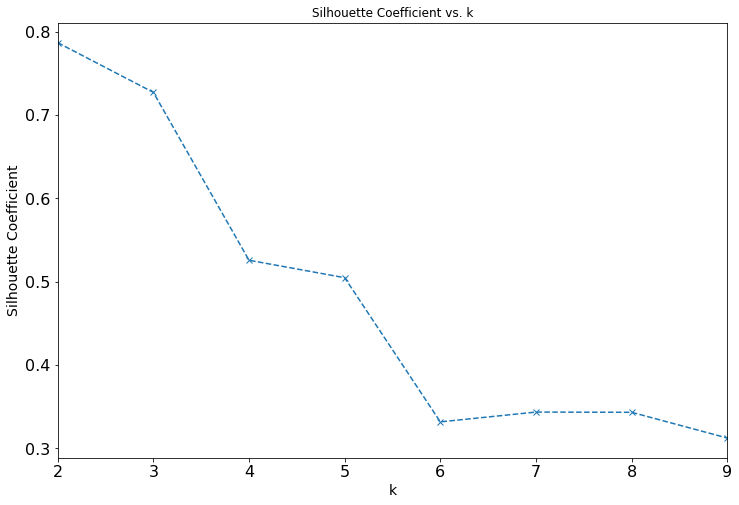

In [129]:
sc_scores = []

for k in clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(processed_feas)
    sc_score = metrics.silhouette_score(processed_feas, kmeans_model.labels_, sample_size=2000, metric='euclidean')
    # sc_score = metrics.calinski_harabaz_score(processed_feas, kmeans_model.labels_)
    sc_scores.append(sc_score)
    print(sc_score)
    
plt.figure(figsize=(12, 8))
plt.plot(clusters, sc_scores, 'x--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette Coefficient', fontsize=14)
# plt.ylim(-1.0, 1.0)
plt.xlim(2, 9)
plt.title('Silhouette Coefficient vs. k')

32441.81638736064
26476.039314923586
22439.501130491022
20171.311098554175
18149.58499943061
17010.886814849837
15698.096009870902
14607.45814961032


Text(0.5, 1.0, 'SSE vs. k')

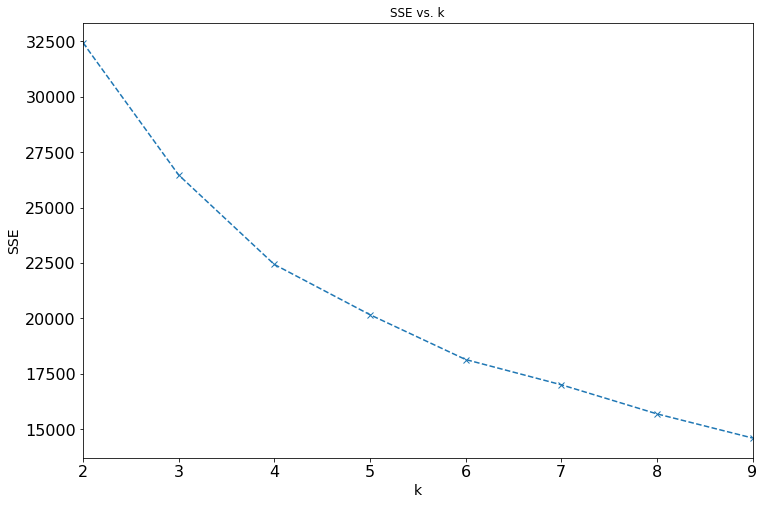

In [130]:
see_scores = []

for k in clusters:
    kmeans_model = KMeans(n_clusters=k, random_state=3).fit(processed_feas)
    see_score = kmeans_model.inertia_
    see_scores.append(see_score)
    print(see_score)
    
plt.figure(figsize=(12, 8))
plt.plot(clusters, see_scores, 'x--')
plt.xlabel('k', fontsize=14)
plt.ylabel('SSE', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.ylim(-1.0, 1.0)
plt.xlim(2, 9)
plt.title('SSE vs. k')

In [132]:
ret = KMeans(n_clusters=5, random_state=3).fit(red_M)

In [133]:
all_feas['label'] = ret.labels_

In [137]:
all_feas[all_feas.label == 4]

,id,name,screen_name,location,statuses_count,friends_count,followers_count,u_TaylorSwift_following,u_ESPN_following,u_BillGates_following,u_YouTube_following,u_CNN_following,u_BarackObama_following,u_KimKardashian_following,u_CristianoRonaldo_following,u_JimmyFallon_following,u_OprahWinfrey_following,u_LilWayne_following,u_NASA_following,label
2,1209342383508221953,David,DHarrison_01,City of Angles,31,142,7,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4
6,20810935,Gary Robinson,bosoxs77,N 51°30' 0'' / W 0°5' 0'',256,486,44,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
12,92364162,Lauren Tompkins,Ms_laurent_,NaN,0,72,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
30,1134443868617924608,Wyllian Velho,wyllian150,Brasil,0,75,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
32,1213492563493056512,WhiteSox68,whitesox68,NaN,0,270,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4
58,1212447302910017536,Timmy Woods,TimmyWoods8,NaN,1,73,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4
80,1206644520768675842,Skinny Da G,SkinnyDaG1,NaN,156,128,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
89,836117460,henrique douglas,henriquedougl17,"Cabula, Salvador",2,4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
94,3450096509,Jason Culver,Blkkngt5,NaN,103,176,18,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4
111,229495296,joão lucas,jlucasabare,abare-bahia,3828,1678,159,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4
